In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


import sys
path_to_mavenn_local = '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_local'
sys.path.insert(0,path_to_mavenn_local)

import mavenn
from mavenn.src.utils import get_example_dataset

In [2]:
#NAR = mavenn.load('model_files/NAR_sort_seq',regression_type='NA')

In [3]:
NAR = mavenn.load('model_files/NAR_sort_seq',regression_type='NA')

In [4]:
NAR.get_nn().summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence_labels_input (InputLay (None, 166)          0                                            
__________________________________________________________________________________________________
Sequence_only (Lambda)          (None, 156)          0           Sequence_labels_input[0][0]      
__________________________________________________________________________________________________
phiPrime (Dense)                (None, 1)            157         Sequence_only[0][0]              
__________________________________________________________________________________________________
fix_diffeomorphic_mode (fixDiff (None, 1)            0           phiPrime[0][0]                   
__________________________________________________________________________________________________
phi (Dense

In [5]:
#phi = NAR.x_to_phi(sequences)

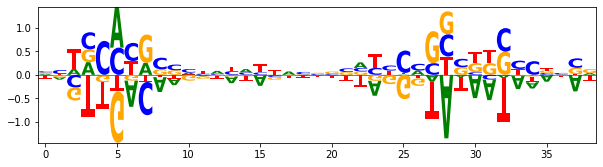

In [6]:
import logomaker
theta_df = pd.DataFrame(NAR.get_gpmap_parameters()['value'].values[1:].reshape(39,4),columns=['A','C','G','T'])
logomaker.Logo(theta_df,center_values=False)

In [7]:
phi_range = np.linspace(-4,9,500)
p_of_all_y_given_phi = NAR.na_p_of_all_y_given_phi(phi_range)

In [8]:
NAR.na_p_of_all_y_given_phi([0.5,0.6])

array([[0.11045785, 0.1624371 , 0.15288876, 0.15925078, 0.1263143 ,
        0.13073842, 0.06662513, 0.05208132, 0.02624621, 0.01296012],
       [0.10968389, 0.16972987, 0.15731488, 0.16282727, 0.12647922,
        0.12786742, 0.06292269, 0.04812796, 0.02370068, 0.01134607]],
      dtype=float32)

In [9]:
NAR.p_of_y_given_phi(2,[0.5,0.1])

array([0.15288876, 0.12653415], dtype=float32)

[Text(0.5, 0, '-4.0'), Text(20.5, 0, '2.'), Text(40.5, 0, '9.0')]

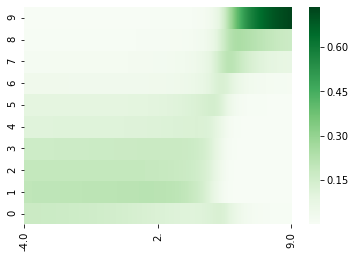

In [10]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6,4))
if p_of_all_y_given_phi.T[p_of_all_y_given_phi.T.shape[0]-1][0]>p_of_all_y_given_phi.T[p_of_all_y_given_phi.T.shape[0]-1][p_of_all_y_given_phi.T.shape[1]-1]:
    ax = sns.heatmap(pd.DataFrame(p_of_all_y_given_phi.T).loc[::1,::-1],cmap='Greens')
else:
    ax = sns.heatmap(p_of_all_y_given_phi.T,cmap='Greens')    
ax.invert_yaxis()
ax.set_xticks(([0,int(len(phi_range)/2),len(phi_range)-2]), minor=False)
middle_tick = str(phi_range[int(len(phi_range)/2)])
ax.set_xticklabels(([str(phi_range[0])[0:5],middle_tick[0:2],str(phi_range[len(phi_range)-1])[0:5]]), minor=False)

In [11]:
NAR.get_gpmap_parameters()

,name,value
0,theta_0,6.194942
1,theta_0:A,0.022966
2,theta_0:C,0.027587
3,theta_0:G,0.027125
4,theta_0:T,-0.077678
...,...,...
152,theta_37:T,0.015774
153,theta_38:A,0.038822
154,theta_38:C,-0.000644
155,theta_38:G,0.084273
